# Assignment #1 - Linear Regression

<font color="red"> <b> Due: Oct 9 (Friday) 11:00 pm </b> </font>

<font color="blue"> Akshay Patil </font>

# Introduction

The aim of the assignment is to use two linear regression algorithms to perform analysis on a any data set. In this assignment we will be using 'Air-Quality-Dataset' for our analysis obtained from UCI repsoitory. The former is used to train the model while the latter is used to check the accuracy of the modelThe Least squares and the Least Mean Squares method are deployed. Both methods are used to obtain optimal parameters by using the data that is fed to the model. The data is divided in two parts, training set and testing set. 

The crux of the Least squares method is the Normal equation which makes use of the whole datatset ( training dataset) in a single step while obtaining the parameters.
The LMS method is an iterative method in which data is fed at one instance per iteration, while manipulating or updating the parameter at each step.


# Method

Summarize the linear models (least-squares and LMS) and explain your implementation of **class** *LinearModel*. 
The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the linear models 
 - your implementation and description

## Super Class and Class for Least squares and LMS method

We now implement OOP style class and object for our Machine Learning model. Define super class i.e 'Base model' which inherits class 'ABC' imported from abc module. Later define abstract class Linear Model which inherits from the Base model. Two different functions are defined for this class. The 'check_matrix' function checks if the given input is a two dimensional matrix, if not it raises an error. The 'add_ones' function transforms a given matrix $X_{n \times d}$ into a $X_{n \times (d+1)}$ matrix by appending vector of ones in the 0th column.

In [1]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        
        #self.wght=None
        """
            weight vector w is initialized as None
        """
        

    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass

### Review: Least Squares

Define a class for Linear regression which inherits from the class 'Linear model' and the latter inherits from super class 'Base model'.

The train function in Linear regression class makes use of the normal equation to calculate the optimal paramters. The function returns the closed from solution. We make use full dataset (training dataset) while calculating the parameters. Though we don't have to worry about the convergence in this case, but the algorithm's speed decreases as the amount of the data fed to model increases. 

**Normal Equation :**  $\hat{\theta} = (X^T . X ) ^ {-1} . X ^ T . y$

$\bullet$ $\hat{\theta}$ is the value of $\theta$ that minimizes the cost function

$\bullet$ $y$ is the vector of target values

The 'use' function then makes use of the parameters obtained from the training function to calculate target values for training set or to make prediction as required.

In [2]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train least-squares model
    def train(self, X, T):
        N = X.shape[0]
        X1 = self.add_ones(X)
        self.w = np.linalg.inv(X1.T @ X1) @ X1.T @ T 
        return self.w
    
    # apply the learned model to data X
    def use(self, X):
        N = X.shape[0]
        X1 = self.add_ones(X)
        y = X1 @ self.w
        
        return y      

### Review: Least Mean Squares

Define a class for 'Least mean squares' which inherits from the class 'Linear model' and the latter inherits from super class 'Base model'.
LMS is an iterative algorithm that takes one instance at a time as an input and thereby optimizing the parameters at each step. 
After initializing the paramteres at values zero, the train functions extracts single instance at a time and passes it on to function train_step where it uses the current parameters to calculate expected target value and then updates the the parameters using suitable learning rate.

**update rule :**     $w^{(k+1)} = w^{(k)} - \alpha (w^{(k)^T}  x_k - t_k)x_k$

In [3]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    """
        Lease Mean Squares. online learning algorithm
    
        attributes
        ==========
        w        nd.array
                 weight matrix
        alpha    float
                 learning rate
    """
    w = np.zeros([1,1])
    #alpha = 0.001
    
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
    
    # batch training by using train_step function
    def train(self, X, T):
        for x,t in zip(X,T):
            self.train_step(x,t)
        
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        N = x.shape[0]
        X1 = np.hstack((np.ones(1),x))
        N = X1.shape[0]
        if(len(self.w)!= N):
            self.w = np.zeros(N)
        y = self.w @ X1
        self.w -= self.alpha * (y - t) * X1
       
    
    # apply the current model to data X
    def use(self, X):
        N = X.shape[0]
        X1 = np.hstack((np.ones((N, 1)), X.reshape((X.shape[0], -1))))
        y = X1 @ self.w
        N = X1.shape[0]
        y.shape = (N,1)
        return y

### Usage Examples

In [4]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

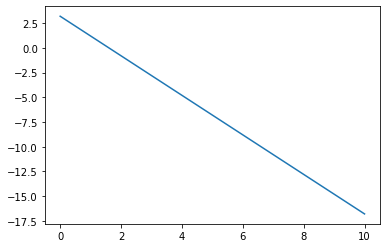

In [5]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()

ls.train(X, T)

plt.plot(ls.use(X))

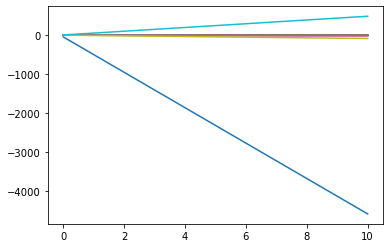

In [6]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

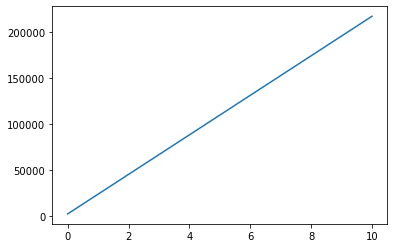

In [7]:
lms.train(X, T)
plt.plot(lms.use(X))

# Preliminary Test

After finishing the implmentation of LinearRegress and LMS classes, run the following cell to test if your implementation is correct. Make sure and check your codes to pass all three tests as in sample outputs. 

In [8]:
##################### WHAT I WILL RELEASE ############

# Self-Test code for accuracy of your model - DO NOT MODIFY THIS
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


# Regression data and analysis 


**Aim:** To perform linear regression analysis on the 'Air quality dataset' to predict the Benzene $(C_6H_6)$concentration in air.

### Air Quality data
The data is obtained from UCI repository. It can be found here:https://archive.ics.uci.edu/ml/datasets/Air+Quality# Dataset contains the responses of a gas multisensor device deployed on the field in an Italian city. Hourly responses averages are recorded along with gas concentrations references from a certified analyzer. The data set contains around 10,000 instances and 15 features. Basically 5 metal oxide chemical sensors were deployed to target particular chemicals. [2]

Sensors : Chemicals(Targeted)

Tin Oxide : CO

Titania : NMHC

Tungsten Oxide : NOx

Tungsten Oxide : NO2

Indium Oxide : O3

In [9]:
#Importing modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the data


The data set is excel file. It is uploaded using pandas module. The data set contains around 10,0000 instances and 15 features in total. This data set can be used to regress the amount of any particular chemical sensed by a sensor in the air like benzene C6H6 for example. Ground Truth horly average for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) is provided by a co-located reference certified analyzer.

Following is the attribute information taken directly from UCI website 
Attribute Information: [3]

We combine the date and time column and make it as a index.( See dataframe info below)
 
 Date (DD/MM/YYYY) _Time (HH.MM.SS) 

0 True hourly averaged concentration CO in mg/m^3 (reference analyzer) 

1 PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted) 

2 True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer) 

3 True hourly averaged Benzene concentration in microg/m^3 (reference analyzer) 

4 PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted) 

5 True hourly averaged NOx concentration in ppb (reference analyzer) 

6 PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted) 

7 True hourly averaged NO2 concentration in microg/m^3 (reference analyzer) 

8 PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted) 

9 PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted) 

10 Temperature in Â°C 

11 Relative Humidity (%) 

12 AH Absolute Humidity

### Storing the data

In [10]:
#Dataset included in zip flder
df = pd.read_excel('AirQualityUCI.xlsx', parse_dates = [['Date', 'Time']])
df = df.set_index('Date_Time')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   int64  
 3   C6H6(GT)       9357 non-null   float64
 4   PT08.S2(NMHC)  9357 non-null   float64
 5   NOx(GT)        9357 non-null   float64
 6   PT08.S3(NOx)   9357 non-null   float64
 7   NO2(GT)        9357 non-null   float64
 8   PT08.S4(NO2)   9357 non-null   float64
 9   PT08.S5(O3)    9357 non-null   float64
 10  T              9357 non-null   float64
 11  RH             9357 non-null   float64
 12  AH             9357 non-null   float64
dtypes: float64(12), int64(1)
memory usage: 1023.4 KB


In [11]:
df.head(2)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.6,48.875001,0.757754
2004-03-10 19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.3,47.700000,0.725487


### Pre Processing of the data.


This dataset contains (-200) in place of missing values. If we delete this observation we will be left with very few data. so we replaced this missing values with their particular means.

In [12]:
df = df.replace({-200 : np.nan})

In [13]:
df.mean()[:3,] # Two values shown for reference

CO(GT)            2.152750
PT08.S1(CO)    1099.707856
NMHC(GT)        218.811816
dtype: float64

Missing values are filled with their respective means and now our dataset is ready for visualization. We shift our target columns that is Benzene $(C_6H_6)$ at the end

In [14]:
df = df.fillna(df.mean())
df = df[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)',
       'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
       'T', 'RH', 'AH', 'C6H6(GT)']]

# Data Visualization


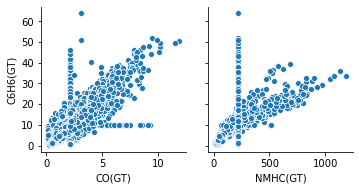

In [15]:
pp = sns.pairplot(data=df,
                  y_vars=['C6H6(GT)'],
                  x_vars=['CO(GT)', 'NMHC(GT)'])

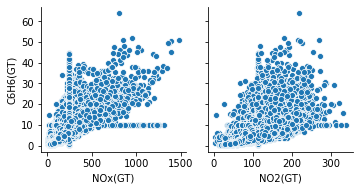

In [16]:
pp = sns.pairplot(data=df,
                  y_vars=['C6H6(GT)'],
                  x_vars=['NOx(GT)','NO2(GT)'])

Comparing Benzene concentration with true concetration of CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2)

From the above comparision plots we can see benzene concentration linearly increases with concentration of CO and Non Metanic Hydrocarbons (NMHC).

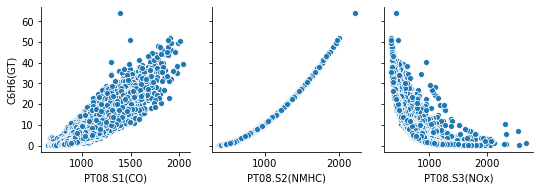

In [17]:
pp = sns.pairplot(data=df,
                  y_vars=['C6H6(GT)'],
                  x_vars=['PT08.S1(CO)','PT08.S2(NMHC)','PT08.S3(NOx)'])

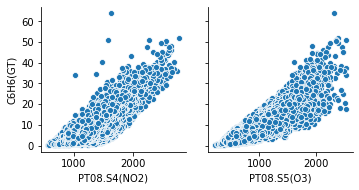

In [18]:
pp = sns.pairplot(data=df,
                  y_vars=['C6H6(GT)'],
                  x_vars=['PT08.S4(NO2)', 'PT08.S5(O3)'])

Comparing Benzene concentration with responses from 5 different sensors for 5 different chemicals. 

Benzene concentration shows strong linearity with responses from sensor 2 which is used to capture NMHC concentration. Also, benzene and NOx are varying exponentially.

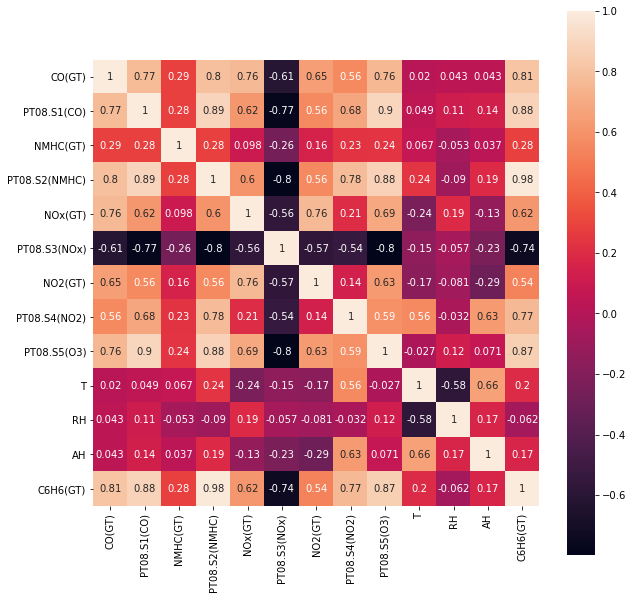

In [19]:
f = plt.subplots(figsize=(10, 10))
corr = df.corr()
sns.heatmap(data=corr, square=True, annot=True,cbar=True)
plt.show()

The correlation heatmap, confirms that our target variable Benzene concentration and responses from sensor 2 (NMHC) have a positive corelation, which suggests as NMHC concentration increases Benzene concentration increases as well. 
Also benzene concentration and responses from sensor 3 ( NOx) are negatively correlated.


## Preliminary observation

After the analysis of the Dataset from the above visualization the following observations can be seen as follows

Benzene concentration and presence of non metanic hydrocarbons is strongly correlated. 

Benzene concentration and presence of Carbon monooxide (CO) is also strongly correlated.

Above observation can be confirmed as Benzene $(C_6H_6)$ is made of Carbon and Hydrogen, the presence of NMHC and Co suggest strong presence of benzene concentration in atmosphere. 

Also as the concentration of NOx increases, concentraion of benzene decreases exponentially.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9357 entries, 2004-03-10 18:00:00 to 2005-04-04 14:00:00
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         9357 non-null   float64
 1   PT08.S1(CO)    9357 non-null   float64
 2   NMHC(GT)       9357 non-null   float64
 3   PT08.S2(NMHC)  9357 non-null   float64
 4   NOx(GT)        9357 non-null   float64
 5   PT08.S3(NOx)   9357 non-null   float64
 6   NO2(GT)        9357 non-null   float64
 7   PT08.S4(NO2)   9357 non-null   float64
 8   PT08.S5(O3)    9357 non-null   float64
 9   T              9357 non-null   float64
 10  RH             9357 non-null   float64
 11  AH             9357 non-null   float64
 12  C6H6(GT)       9357 non-null   float64
dtypes: float64(13)
memory usage: 1023.4 KB


# Experiments

Apply LS and LMS methods on the data and discuss the results.
Please describe your experiment and related codes. You may have subsections of results and discussions here.


Split the data in Training and Test set.
We will use 8000 instances for training the model and the rest for testing our model. But first lets store our predictors in X and our response variable in T as follows

In [21]:
X = df[['CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
       'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH',
       'AH']].copy()

T = df[['C6H6(GT)']].copy()

Splitting the data

In [22]:
training_data = df.iloc[:8000,:]
testing_data = df.iloc[8000:9357,:]

X_on_Train = X.iloc[:8000,:]
X_on_Test = X.iloc[8000:9357,:]
T_on_Train = T.iloc[:8000,:]
T_on_Test = T.iloc[8000:9357,:]


X_Train = np.array(X_on_Train)
X_Test = np.array(X_on_Test)

T_Train = np.array(T_on_Train)
T_Test = np.array(T_on_Test)

## Analysis using Least squares method

LinearRegress is class. So we make an object named least_square in order to use the class functionality of training the data and then later predicting the response on the test data

In [23]:
least_square = LinearRegress()
least_square.train(X_Train,T_Train)
T_Predicted = least_square.use(X_Test)


In [24]:
rmse(T_Test,T_Predicted)

53.69007430263598

### Visualizing Results

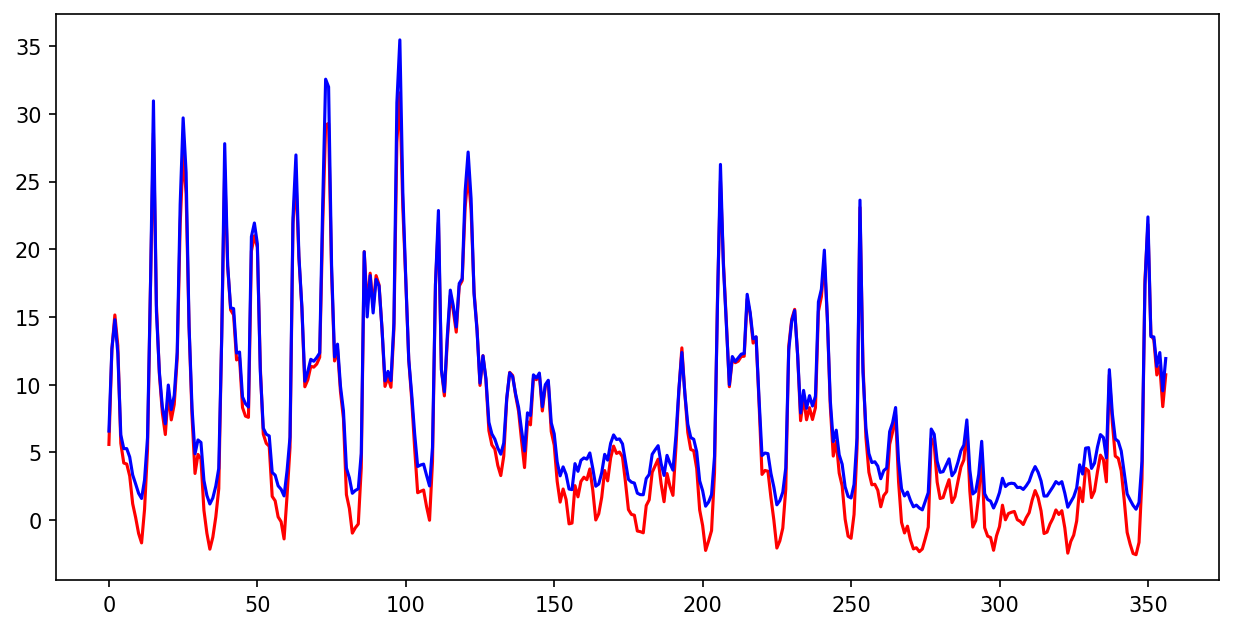

In [25]:
fig=plt.figure(figsize=(10, 5), dpi= 150)
plt.plot(T_Predicted[1000:],'-r')
plt.plot(T_Test[1000:],'-b')
plt.show()

The low RMSE value and the plot of test values against the predicted values, shows the model is performing better on test values.

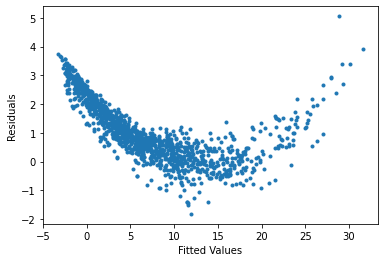

In [26]:
Residuals = T_Test - T_Predicted 
plt.plot(T_Predicted,Residuals, '.')
plt.xlabel('Fitted Values')
plt.ylabel("Residuals")
plt.show()

The Residual plot exhibits a clear U-shape, which provides a strong indication of non linearity in data. Simple approach is to use non-linear transformations of the predictors like a quadratic term.


## Analysis using Least Mean Squares Method


LMS is class. So we make an object named lms in order to use the class functionality of training the data by feeding the model one instance per iteration and then later predicting the response on the test data

In [27]:
lms = LMS(0.0000001)
lms.train(X_Train,T_Train)
T_Predict = lms.use(X_Test)

In [28]:
rmse(T_Test, T_Predict)

93.13962567033983

## Visualising the data

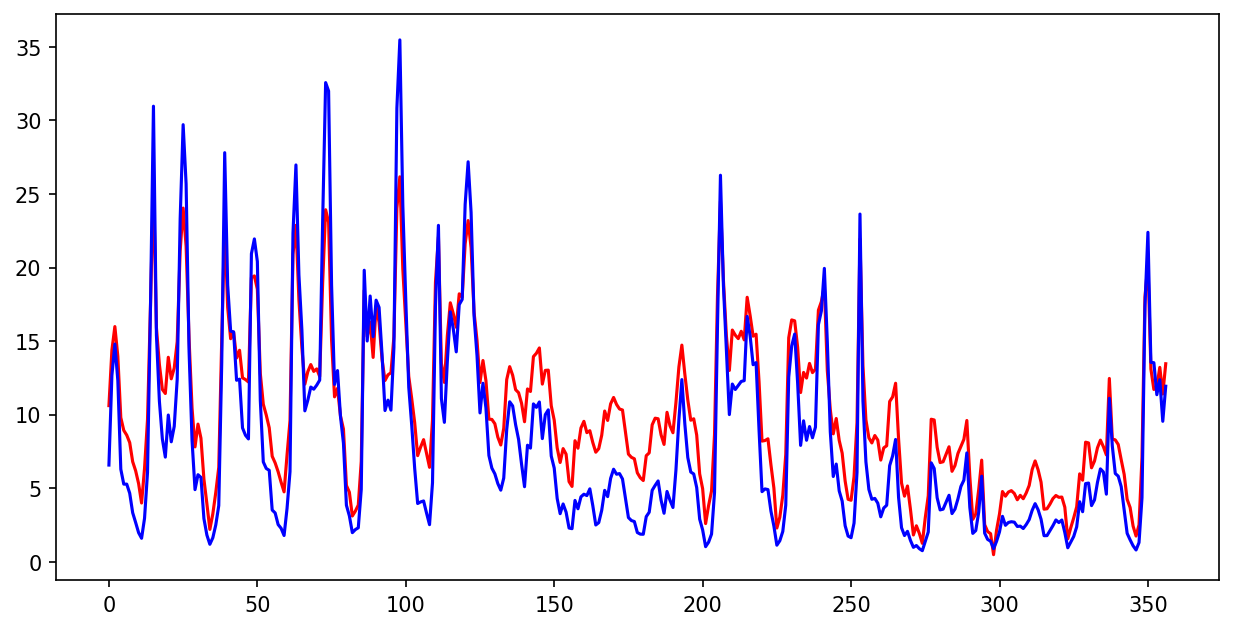

In [29]:
fig=plt.figure(figsize=(10, 5), dpi= 150)
plt.plot(T_Predict[1000:],'-r')
plt.plot(T_Test[1000:],'-b')
plt.show()

Learning rate was kept so small in order to LMS to work without any error. The model works well in predicting the output

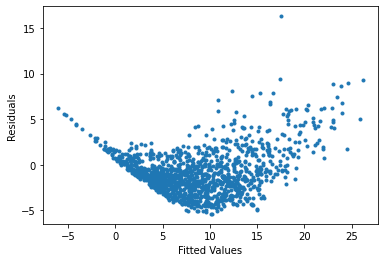

In [30]:
Residuals = T_Test - T_Predict
plt.plot(T_Predict,Residuals, '.')
plt.xlabel('Fitted Values')
plt.ylabel("Residuals")
plt.show()

The residuals vs fitted plot shows non linearity, which suggests data need to be transformed in order to fit a better model. 

## Analysis and comparision

After fitting both the model we can see RMSE for Least squares method is around 53.69 and the RMSE for LMS model is 93.14. Therefore Error rate of the least squares method is less than the LMS algorithm.

The Least squares algorithm is based on Normal equation. So it ran without any problem. We did not need to do any hyper parameter tuning in order for the model to work. On the other hand for the LMS algorithm the the learning rate need to be tuned in order for the model to work. But it did work on a very low learning rate. It is difficult to find right alpha.

For this dataset the least squares model performed better than the LMS model. As the learning rate is very important in determining the accuracy of the model, LS perfomed slightly better. 

# Conclusions

From the results we can conclude that for low instance data set LS model performs better. LMS can work well if one finds optimal learning rate. If the data set is very very large than LMS is more suitable than the LS model. As it can be difficult to calculate the inverse of such a huge matrix. So one need to appropriately slect a model according to his data and according to his hypothesis.

# References

Air quality data. Retrieved from https://archive.ics.uci.edu/ml/datasets/Air+Quality

Matplotlib. Retrieved from https://matplotlib.org/

Seaborn. Retrieved from https://seaborn.pydata.org/

Stackoverflow. Retrived from https://stackoverflow.com/

Gareth James, Daniela Witten, Trevor Hastie, Robert Tibshirani. An Introduction to Statistical Learning : with Applications in R. New York :Springer, 2013. 

And More

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run well after running your codes. 

** Note: this is a WRITING assignment. Proper writing is REQUIRED. Comments are not considered as writing. ** 


Points | | Description
--|--|:--
5 | Introduction  
20 | Data | 
 | 5| description 
 | 5| plots for understanding or analysis 
 | 5| preliminary observation 
 | 5| Preprocessing of the data 
40 | Method | 
 | 5| review
 | 5| explanation of codes
 | 30| Correct implementation (preliminary test)
30 | Experiments | 
 | 5| description, codes
 | 10| visualization of results
 | 15| analysis / comparison of algorithms
5 | Conclusions, References 